# Google Drive Setup

In [1]:
# from google.colab import drive

# ROOT = "/content/drive"     # default location for the drive
# print(ROOT)                 # print content of ROOT (Optional)

# drive.mount(ROOT)    
#cd /content/drive/My\ Drive/Masters/Deep\ Learning/model_evaluator/model_evaluator

# Navigate to Working Directory

# Model Evaluator Class

TODO:

1. Add model_training_class which stores the model_state_dict - Done
2. Add methods to store and retrive the information - Done
3. Add methods to print the information
4. Add methods to visualize between the models
5. Statements to deal with empty dictionary if it exists - list models, retreive loss over
6. Solidify and Covey the rigidity of the structure of dictionary i.e validate if the train_dict will fit the structure of the class

In [35]:
import model_evaluator as me

# Dataset Download

In [36]:
#building a network
from torch import nn,optim
import torch.nn.functional as F
import datetime
import os
import cv2

In [37]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

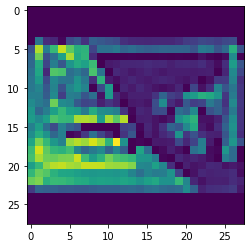

In [38]:
import matplotlib.pyplot as plt
images,label = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())

# Training Process and Dictionary Filling

In [39]:
def train_model(epochs,train_loader,model,criterion,optimizer,device = 'cpu',print_time_stats=True,model_evaluator = None):
    model_dict = model_evaluator.init_model()
    
    model_dict['model_architecture']['model'] = str(model)
    model_dict['model_architecture']['criterion'] = str(criterion)
    model_dict['model_architecture']['optimizer'] = str(optimizer)
    
    model_dict['data']['train_set'] = str(trainset)
    
    model_dict['training_parameters']['no_of_steps_per_epoch'] = len(train_loader)
    model_dict['training_parameters']['device'] = device
    model_dict['training_parameters']['epochs'] = epochs
    model_dict['training_parameters']['time'] = str(datetime.datetime.now())
    
    
    
    
    train_start_time = datetime.datetime.now()
    model.train()
    for e in range(epochs):
        epoch_start_time = datetime.datetime.now()
        running_loss = 0
        for images,labels in train_loader:
            if device != 'cpu':
                images, labels = images.cuda(),labels.cuda()
            images = images.view(-1,28*28)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss
        print(f"Average Loss per Batch : {running_loss/len(train_loader)}")
        model_dict['training_stats']['epoch_average_batch_loss'].append(running_loss.item()/len(train_loader))
        epoch_end_time = datetime.datetime.now()
        model_dict['training_stats']['epoch_time'].append(str(epoch_end_time - epoch_start_time))
        if print_time_stats:
            print(f"Epoch Time : {epoch_end_time - epoch_start_time}")
    train_end_time = datetime.datetime.now()
    model_dict['training_stats']['total_train_time'] = str(train_end_time - train_start_time)
    if print_time_stats:
        print(f"Training Time : {str(train_end_time - train_start_time)}")
    return model_dict

In [40]:
model = nn.Sequential(
                    nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,32),
                    nn.ReLU(),
                    nn.Linear(32,10),
                    nn.LogSoftmax(dim=1)
)
#defining the loss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
fashion_mnist = me.ModelEvaluator('fashion_mnist',file_path='fashion_mnist_test.pkl')

In [34]:
model_train_dict = train_model(5,trainloader,model,criterion,optimizer,model_evaluator=fashion_mnist)

Average Loss per Batch : 0.5436866283416748
Epoch Time : 0:00:12.745347
Average Loss per Batch : 0.44070225954055786
Epoch Time : 0:00:12.165357
Average Loss per Batch : 0.4125708341598511
Epoch Time : 0:00:11.679751
Average Loss per Batch : 0.3965475261211395
Epoch Time : 0:00:12.845870
Average Loss per Batch : 0.39750272035598755
Epoch Time : 0:00:12.645934
Training Time : 0:01:02.082491


In [42]:
fashion_mnist.reset_experiment()

In [43]:
fashion_mnist.is_empty()

True

In [44]:
fashion_mnist.add_model('fashion_mnist_1',model_train_dict)

In [45]:
fashion_mnist.list_models()

fashion_mnist_1


In [46]:
fashion_mnist.models

{'fashion_mnist_1': {'model_architecture': {'model': 'Sequential(\n  (0): Linear(in_features=784, out_features=128, bias=True)\n  (1): ReLU()\n  (2): Linear(in_features=128, out_features=32, bias=True)\n  (3): ReLU()\n  (4): Linear(in_features=32, out_features=10, bias=True)\n  (5): LogSoftmax()\n)',
   'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.999)\n    eps: 1e-08\n    lr: 0.01\n    weight_decay: 0\n)',
   'criterion': 'NLLLoss()'},
  'data': {'train_set': 'Dataset FashionMNIST\n    Number of datapoints: 60000\n    Root location: /Users/kitezstore/.pytorch/F_MNIST_data/\n    Split: Train\n    StandardTransform\nTransform: Compose(\n               ToTensor()\n               Normalize(mean=(0.5,), std=(0.5,))\n           )'},
  'training_parameters': {'no_of_steps_per_epoch': 938,
   'device': 'cpu',
   'epochs': 5,
   'time': '2020-05-15 22:56:08.007829'},
  'training_stats': {'total_train_time': '0:01:02.082491',
   'epoch_time': ['0:00:12.745347'